In [1]:
import pandas as pd
from math import ceil, floor
import matplotlib.pyplot as plt
import seaborn as sns
import json
import matplotlib
from matplotlib import ticker
%matplotlib inline

In [2]:
data = pd.read_csv("../components/artifacts/postprocess_data.csv", sep = "\t", index_col = 0)
data["Date"] = pd.to_datetime(data["Date"])
data["Gender"] = data["Gender"].astype("category")
data["Account Type"] = data["Account Type"].astype("category")
data["Tweet Type"] = pd.Categorical(values = data["Tweet Type"], categories = ["share", "reply", "post"], ordered = True)

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
data.head()

,Date,Page Type,Author,Full Name,Full Text,Hashtags,Impact,Impressions,Tweet Type,Thread Author,...,screen,Gender,Account Type,Ethnicity,followers_count,screen_originator,Gender_originator,Account Type_originator,Ethnicity_originator,followers_count_originator
0,2017-12-06 23:59:59,twitter,William82861606,William82861606 (William),funder conyers resigned franken resigning tomo...,"#trumpsexprobe, #metoo",0.0,282.0,share,funder,...,William82861606,male,core,Asian,2548.0,funder,male,influencer,White,336269.0
1,2017-12-06 23:59:58,twitter,Artis_Elemental,Artis_Elemental (ART...Is),alyssa_milano list sexual misconduct allegatio...,#metoo,24.5,5578.0,share,Alyssa_Milano,...,Artis_Elemental,male,core,Black,7217.0,Alyssa_Milano,NaN,celebrity,NaN,3698114.0
2,2017-12-06 23:59:57,twitter,lanah03,lanah03 (Laura Hopkins),deepinthehills sobbing silent longer,#metoo,5.4,2713.0,share,DeepInTheHills,...,lanah03,female,core,Black,2775.0,NaN,NaN,NaN,NaN,NaN
3,2017-12-06 23:59:55,twitter,lidskawasaki,lidskawasaki (dearlordbabyjesus),alyssa_milano time asking franken resign senat...,"#timepersonoftheyear, #metoo",0.0,330.0,share,Alyssa_Milano,...,lidskawasaki,female,core,Black,655.0,Alyssa_Milano,NaN,celebrity,NaN,3698114.0
4,2017-12-06 23:59:54,twitter,IAmMeliLopez,IAmMeliLopez (Melissa Lopez),nycchr public hearing begun stories deserve he...,"#sexualharassment, #metoo",0.0,13.0,share,NYCCHR,...,IAmMeliLopez,female,core,Asian,18.0,NYCCHR,male,core,Black,12572.0


In [4]:
data.columns


Index(['Date', 'Page Type', 'Author', 'Full Name', 'Full Text', 'Hashtags',
       'Impact', 'Impressions', 'Tweet Type', 'Thread Author',
       'Twitter Followers', 'Twitter Following', 'Twitter Tweets',
       'Twitter Reply Count', 'Twitter Verified', 'Twitter Retweets',
       'Reach (new)', 'Region', 'topic_1', 'topic_2', 'topic_3', 'topic_4',
       'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10',
       'screen', 'Gender', 'Account Type', 'Ethnicity', 'followers_count',
       'screen_originator', 'Gender_originator', 'Account Type_originator',
       'Ethnicity_originator', 'followers_count_originator'],
      dtype='object')

In [5]:
topic_score_cols = [x for x in data.columns if 'topic' in x]
topic_data = data[['Date','Author','Page Type','Account Type','Full Text'] + topic_score_cols]
topic_data['Topic'] = topic_data[topic_score_cols].idxmax(axis=1)

topic_data.head()

<ipython-input-5-893862cee2d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_data['Topic'] = topic_data[topic_score_cols].idxmax(axis=1)


,Date,Author,Page Type,Account Type,Full Text,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,Topic
0,2017-12-06 23:59:59,William82861606,twitter,core,funder conyers resigned franken resigning tomo...,0.000000,0.996263,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,topic_2
1,2017-12-06 23:59:58,Artis_Elemental,twitter,core,alyssa_milano list sexual misconduct allegatio...,0.000000,0.990108,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,topic_2
2,2017-12-06 23:59:57,lanah03,twitter,core,deepinthehills sobbing silent longer,0.596061,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.384160,0.000000,topic_1
3,2017-12-06 23:59:55,lidskawasaki,twitter,core,alyssa_milano time asking franken resign senat...,0.000000,0.000000,0.0,0.0,0.000000,0.415957,0.0,0.0,0.125327,0.455225,topic_10
4,2017-12-06 23:59:54,IAmMeliLopez,twitter,core,nycchr public hearing begun stories deserve he...,0.000000,0.000000,0.0,0.0,0.991077,0.000000,0.0,0.0,0.000000,0.000000,topic_5


In [6]:
for topic in topic_score_cols:
    print(f'TOPIC {topic}')
    display(topic_data[topic_data['Topic'] == topic][['Date','Author','Page Type','Account Type','Full Text']].sample(20))
    display('-'*30)

TOPIC topic_1


,Date,Author,Page Type,Account Type,Full Text
3754119,2018-03-18 03:42:10,GabrielaDow,twitter,core,amazing proud mirasorvino alma mater ucla plus...
350378,2018-10-03 14:43:43,ColumbusNeon,twitter,core,realdonaldtrump people fascist hitleresque ral...
5237009,2020-01-17 03:42:06,phat_walt,twitter,core,afghani men accused rape american sisters sist...
4010226,2018-10-26 01:12:16,jocodad,twitter,organisational,jewell_guzman jagpolitical lucylu cnnsitroom c...
5857625,2018-03-30 02:31:51,treasurelife3,twitter,core,maybehumanuknow cult sex slaves branding cages...
223115,2018-01-08 05:03:29,sharedeconomyus,twitter,core,thr red carpet review message mixes awkwardly ...
6433084,2017-11-12 23:56:13,mommasaysobama,twitter,core,katergordon says matthewweiner joan peggy
6180970,2017-12-10 00:38:30,belindapreno,twitter,core,ktzhu itsgabrielleu speaking women stories bra...
2739656,2017-12-14 03:14:04,jooliabutler,twitter,core,rwitherspoon truer words spoken awe dear frien...
5523304,2018-03-09 21:16:00,Blank09472808,twitter,core,allkpop actress kang eun bi takes movement rev...


'------------------------------'

TOPIC topic_2


,Date,Author,Page Type,Account Type,Full Text
2669306,2017-12-11 20:37:16,JoannePAQ,twitter,core,carminesabia sen kirsten gillibrand weeks ago ...
854985,2018-02-06 05:55:11,breakpointsaved,twitter,core,kellyawallace wish conversation focused happen...
3648345,2018-06-14 07:01:30,BotBrody15,twitter,core,gayle king thinks needs process interview audi...
3060941,2018-02-11 13:48:09,vubblePOP,twitter,organisational,frances movement growing despite backlash vice...
2770115,2017-12-13 06:35:13,BrownietheBully,twitter,core,funder thankfully doug jones won tired talking...
4597447,2019-01-23 11:26:39,unlikeanything,twitter,core,ex prosecutor south korea case sentenced years...
2662441,2017-12-11 22:40:42,andrewfarago,twitter,core,funder realdonaldtrump sexually assaulted wome...
1225604,2018-09-18 01:06:15,Rewind_Design,twitter,core,tonyschwartz trumps mantra admit especially tr...
4731036,2018-06-22 14:20:50,post_lead,twitter,influencer,intel ceo resigned violating dating rule compa...
2005721,2018-06-05 04:01:01,iloveyoujennay,twitter,core,rtraister wrote mind boggling bill clinton sur...


'------------------------------'

TOPIC topic_3


,Date,Author,Page Type,Account Type,Full Text
3756688,2018-03-17 19:57:25,2011Patriot1775,twitter,core,cia cia retired cia flag officers carry duty g...
2180775,2018-05-08 03:55:32,pabgirl,twitter,core,pink_about_it eric schneiderman resigns allega...
4802469,2018-09-14 07:04:36,CL2Empower,twitter,core,lovelindawang reading normmacdonald hotwater c...
2708085,2017-12-15 13:18:19,SEBASTIANCAT75,twitter,core,nickiknowsnada fact people making fun kelly cu...
2250813,2020-05-10 17:16:01,GregR19709804,twitter,organisational,blaze leftist check hypocrisy showing
3420202,2018-01-23 06:40:46,KevinDrescher,twitter,core,seattleshepard original inspiration rosie rive...
3021923,2017-12-22 01:29:00,auryaun,twitter,core,latest wild variety music news thanks rogalist...
4564101,2019-01-29 23:03:06,Maya27_Bonner,twitter,core,thejournalista disgusting cow absolutely refer...
6667643,2019-10-15 19:18:55,jayoung1892,twitter,core,betoorourke years ago millions shared hashtag ...
1963237,2018-07-02 18:14:11,jjmplsmn,twitter,core,jenseniorny im late party havent read emilyyof...


'------------------------------'

TOPIC topic_4


,Date,Author,Page Type,Account Type,Full Text
1555456,2018-09-25 01:06:48,StappElizabeth,twitter,influencer,realduckies ask question needed hire business ...
3508195,2018-01-30 12:10:48,alfredanchor,twitter,organisational,cspanwj watch thoughts impact movement politic...
2949185,2017-12-30 11:36:34,YourAnonRevolt,twitter,organisational,tictoc founder movement expected lead ball dro...
692780,2018-04-03 01:47:03,mastersonj,twitter,core,cosendem begun debate resolution expel sen ran...
3358990,2018-01-19 15:29:14,tonic516,twitter,core,dashannestokes interesting saying releasetheme...
2202337,2020-05-23 15:16:32,shawnJo16,twitter,core,gregthetourist caireland davehol palmerreport ...
7024974,2017-11-20 06:54:00,DreamForACause,twitter,core,karnythia dont good data sexual violence margi...
6606658,2017-10-27 19:48:59,mettie67,twitter,core,alyssa_milano tweet brought million voices cou...
1264246,2018-09-19 02:35:15,ConstantineKAG,twitter,core,magapill digging year old high school metoos k...
4481429,2019-04-25 21:37:48,ShellyBFree,twitter,core,therightmelissa realdonaldtrump creepy joe app...


'------------------------------'

TOPIC topic_5


,Date,Author,Page Type,Account Type,Full Text
1696276,2019-04-12 17:38:22,kepla4787,twitter,core,dktaylorlane
5166541,2018-02-28 18:10:14,DadHominem,twitter,core,ymbbastepaway fbrparty fbr welcome party times...
3673289,2018-06-11 22:43:07,Believe111Angel,twitter,core,realcandaceo entire premise women stupid weak ...
922963,2018-01-02 02:25:02,dD94865242,twitter,core,funder speakerryan retweets wants open investi...
173749,2018-01-07 22:19:57,Rasa171a,twitter,core,sayno_unite tackling sex trafficking included ...
2938911,2017-12-16 02:27:03,anrimaca100,twitter,core,funder ex intern republican secretary state ed...
5844166,2018-03-31 17:53:58,oliviaptallet,twitter,core,story published today houston chronicle case h...
3500116,2018-01-30 21:26:05,anniebeans59,twitter,core,biasedgirl hey trevornoah gets
5744853,2019-01-08 01:22:05,steveasumner,twitter,core,morethanmysle shared story whyididntreport dif...
2056672,2019-03-16 10:27:36,TrumpCountdown0,twitter,organisational,hours end president trumps term neveragain tru...


'------------------------------'

TOPIC topic_6


,Date,Author,Page Type,Account Type,Full Text
2882804,2017-12-19 18:33:28,yeungdannyg,twitter,core,bmyeung like night shift janitors farmworkers ...
7054483,2017-10-15 23:30:49,June4Wanda,twitter,core,sayshummingbird support share powerful campaign
4549312,2018-01-16 12:34:24,jojisfaith,twitter,core,simone_biles feelings
1960607,2018-07-03 13:48:53,blpress,twitter,core,michaelavenatti topic think women motivated mr...
1596722,2018-09-26 01:47:46,RoZsaJH,twitter,core,bornabrit finally justice served case bill cos...
244739,2018-01-08 02:15:42,AJPreziosi,twitter,core,parkermolloy guess old theme song movement
3441533,2018-01-22 00:40:23,_resist_persist,twitter,core,failing woc need brand feminism inclusive inte...
3135504,2018-02-14 01:57:07,KISSMediaCo,twitter,core,women news psychiatry pasadena joehaaszti
6247405,2019-02-11 13:25:36,MaxineEThompson,twitter,core,tariqnasheed black woman named amber evens act...
4341503,2018-10-06 16:50:06,YoGirlMarly,twitter,core,bitterteat thedailybeast traditionally journal...


'------------------------------'

TOPIC topic_7


,Date,Author,Page Type,Account Type,Full Text
1313903,2018-09-20 01:21:13,TylerFromOhio,twitter,core,almostjingo didn maddow play clip hillaryclint...
5258160,2018-02-04 10:00:49,8rareddy,twitter,core,npr raped twice campus late said word knew blamed
3835633,2018-05-14 16:35:14,birdman8272,twitter,influencer,michaelbeatty oh stormy stormydaniels maga mon...
1991663,2018-06-06 07:04:33,jessicamonroe05,twitter,core,funder breaking aaron persky sentenced brock t...
2844263,2018-12-15 06:17:30,wagatwe,twitter,influencer,stop framing report sexual violence obstacle h...
1381856,2018-09-22 17:31:13,BreatheSharon,twitter,core,graymatterstwit sengillibrand survivor sexual ...
3846540,2018-05-31 16:56:12,nicycle,twitter,core,thehuntinground taking powerful men movement s...
5799267,2020-03-09 11:39:21,Heidilynn_reads,twitter,organisational,hayleymcgregor ok want im gonna lol shall givi...
819977,2018-02-09 00:51:12,Bitterend2013,twitter,core,realsaavedra breaking california democratic la...
876214,2018-01-05 21:38:00,ultravires1776,twitter,core,chsommers read publicly privately misgivings


'------------------------------'

TOPIC topic_8


,Date,Author,Page Type,Account Type,Full Text
5660691,2017-12-04 07:27:30,sistahvegan,twitter,core,despite im surprised abused publicly written h...
5177628,2018-02-27 15:47:50,noralove,twitter,core,girlsreallyrule drug rehab mogul christopher b...
4488250,2018-01-18 23:47:32,NYCity_Plow,twitter,core,marketing female narrative iheartnycbot nyc
1802459,2020-02-02 22:58:48,Letstalkturkey1,twitter,core,teddyargentum yinemimuskul likewise false accu...
4571137,2019-01-29 04:15:40,TZAnnee,twitter,core,tomilahren hey kamalaharris given vocal moveme...
3310841,2018-01-21 14:58:08,ChasingHeros,twitter,influencer,agree brigitte bardot unloads hypocritical cru...
6421440,2019-05-28 17:06:33,gdcribbs,twitter,core,resiliency building skills practice trauma rec...
2351378,2017-10-19 11:57:38,PaoGf23,twitter,core,nancypelosi thank women stepping saying courag...
4238320,2018-10-18 01:47:22,BarbaraAnnHoll4,twitter,core,thegopsux senatemajldr proud ramming proved un...
512759,2017-10-17 18:24:05,amschin,twitter,core,apbenven reminder woman didnt post doesnt mean...


'------------------------------'

TOPIC topic_9


,Date,Author,Page Type,Account Type,Full Text
6559144,2018-12-02 17:19:52,TrumpSupport13,twitter,influencer,wbm_law great christmas song written offensive...
1655433,2018-09-27 04:49:47,Ralphcity,twitter,core,words words words words stand tomorrow thank b...
2949028,2017-12-30 13:02:30,russfla,twitter,core,dept silver linings finally exposes creepy men...
5387871,2020-03-27 19:07:02,EdwardMBurch,twitter,core,lucyflores believewomen means women given oppo...
5356123,2020-04-02 22:19:53,ALDemSocialista,twitter,core,mrs_slinky need honest shit fucking heavy ange...
462656,2017-10-16 05:12:26,harrygod,twitter,core,kellyqpr men shouldnt care someones wife someo...
6930460,2019-12-24 01:51:27,Donna78700883,twitter,core,up_weekly times affirms soros clinton paid wom...
5567188,2017-11-17 10:19:25,melin123,twitter,core,therealcornett breaking msm outlets contacted ...
5352933,2020-04-03 17:04:20,tonybagood1,twitter,core,todd_j funniest thing happen week alyssa milan...
2663395,2017-12-11 22:20:37,LindaLawrey,twitter,core,dtruth kentucky congressman accused forcibly p...


'------------------------------'

TOPIC topic_10


,Date,Author,Page Type,Account Type,Full Text
4972775,2020-04-13 00:54:06,arxvltd,twitter,core,jankel barackobama endorsing sexual predator l...
4467506,2019-04-30 19:57:10,mamoobonnie,twitter,core,puppypalooza wagonknoggin keith billwrh theres...
1225560,2018-09-18 01:07:16,NoraFarr,twitter,core,mrsrabbitresist abuser serving long sentence r...
931868,2018-01-01 18:14:15,dawnlyndel,twitter,influencer,july mccain aug veto proof russian sanctions a...
1239365,2018-09-19 18:45:29,MelissaRLeach,twitter,core,katrinapierson right thing include allegations...
5783865,2020-03-12 01:39:13,satcheluk,twitter,core,glennkirschner suspect stays protective custod...
3537331,2018-01-29 12:49:09,kwilli1046,twitter,influencer,drmartyfox grammys honors female victims sexua...
4224658,2018-10-19 03:26:28,TangrediErin,twitter,core,smithton_m living flotuses laura bush michelle...
5809356,2020-03-04 19:31:27,Marcus80665624,twitter,core,charliekirk democrat runner tonight activists ...
3654720,2018-06-13 13:09:01,MSatheists,twitter,core,southern baptists judgment god reckoning relig...


'------------------------------'

In [7]:
for topic in topic_score_cols:
    print(f'TOPIC {topic}')
    display('|'.join(topic_data[topic_data['Topic'] == topic]['Full Text'].sample(30).tolist()))
    display('-'*30)

TOPIC topic_1


'julesk_fighter mentions blocked including discussion vaccines maybe fuckface andrew wakefield person saying movement tagging company work debate night|laurenduca theres lot handwringing talent lost prominent abusers victims career potential kneecapped exposure sexist toxicity invisible tragedy movement women|tonyschwartz women voices heard harassment sexual assault sunlight best disinfectant|realtimers watch billmaher personal plea melania trump join movement nights realtime|realsaavedra linda tripp says christine blasey ford set movement decade|derekahunter id forgotten nbc network airing goldenglobes bunch people knew harveyweinstein awards journalists didnt report network spiked original story ronanfarrow ass timesup|lolalola founder tarana burke addresses joe biden sexual assault allegation|mysillyplanet pelosi needs younger ones pelosi dems|jennifermcclure hr important businesses today age leadership failures sexual harassment etc hr opportunity lead affect positive change workpl

'------------------------------'

TOPIC topic_2


'dashannestokes dear realdonaldtrump think president makes law sexual predator remove resign sincerely america resist theresistance trumpresign impeachtrump|marcelalandres congrats author jamie della bksideofwind published piece anthology essays happened means sure happens edited lori perkins loriperkinsrab|jwhoopes fbr tonykatz proudboys gavinarmy terrorism antifa timesup lgbtq newyork portland votethemoutnov th gavin mcinnes proud boys domestic terrorist|msellebraten mims kateo listen don want nice harassment stalker treat taste think youve changed mind youd better change sorry harassmentpop|drzuhdijasser hey minnesota deep bench ag keith ellison anti semite anti israel farrakhan protege domestic abuser valid law license mn fundraiser domestic global islamism cair isna mas ksa qatar|cindygallop ive spent past months trying persuade women men speak publicly media record speaks changes women terrified uberblond timesup|charlesmblow point inconvenient truth screaming stop frisk black bo

'------------------------------'

TOPIC topic_3


'unbelievable fucking hoes smh nfl|amy_siskind byline coming surface ridiculous like steve wynn denying sexual misconduct believes hr dept saying complaints means policies don work board fire|iansmadrig billionaire child sex trafficker jeffrey epstein news like good time closer look allegations donald trump raped year old girl epsteins manhattan home trump overdue reckoning|bella_ofa colleges bound history roiled moment nytimes|apentertainment year harvey weinsteins downfall stars talk movement|mog trump corruption plagued administration bolton complaining called ethics checks gotten excessive mog maga millennials|supersoulsunday underestimate everybodys effort power change working women spoke everybody listened salmahayek spark movement|staceyrenae sultanknish songofhannahs yeah|weinstein charge carries minimum years extradited california remember pardons state crimes|rwpusa fake hit biden supporters turn women candidates hillaryclinton sexist primary history watch going prosecutors a

'------------------------------'

TOPIC topic_4


'iwillredpillu texas democrat mark benavides guilty counts continuous trafficking persons pedogate democrats sexcrimes timesup thelastog realmadrid qanon greatawakening votedemsout votethemout news|thedemcoalition st louis circuit attorney investigate growing scandal engulfing gov ericgreitens reports surfaced blackmailed mistress compromising sexual photos timesup|biensur_jetaime context feldman spent pretty adult life exposing rampant pedophilia hollywood believed blackballed gaslighted slandered decades recently people started believe movement|pappiness men dont mother sister daughter father brother son better|neveronbrand guy says hes nervous remind come pretty hard murderers ask doesnt nervous says havent murdered youve learned new friend|year scandal wynn resorts faces regulators|al franken help women congress|latest breaking news breaking|joebiden great example shouldnt excused enacting systemically racist oppressive policies minorities working poor middle class different time c

'------------------------------'

TOPIC topic_5


'dhlovelife famous pal trust coworkers behave respectfully professionally qualified woman attractive personal personnel problem problem movement tonyrobbins|banning baby cold outside light movement boycott christmas song want hippopotamus christmas exploits illegal ownership|un_women powerful men getting away actions women having accountable phumzileunwomen timesup timeisnow world women live free fear csw|movement speed number women leadership slow jenamcgregor|rdcaccavale realsaavedra acosta resign handling case epstein think precedent set kamala harris fall sword|lot touching lot molestation male models mario testino bruce weber sexually exploited lgbti photography|kaitmarieox night trump rally pa liberal protester touched consent said hed throw ground rape feminists supposed believe women defended denied happened left come|realcandaceo glad dave chapelle bringing humor mocking absurdity movement lunacy trans movement fearless hilarious time america bored washed comedians trying poli

'------------------------------'

TOPIC topic_6


'pricklypam read multiple great points makes biden villain wrote violence women act survives despite republican attempts cut funding supreme court decision gutting key provision|great news follow recent pressure entertainment industry following movement hopefully spread industries|silerabbit bourdain bill piece shit entitled rapey gropey grabby disgusting hillary taking weinsteins shameful apology fucking frightening clintons efficiently dismantled destroyed shamelessly discredited women speaking truth|tariqnasheed sounds like bullshit like movement|almostjingo wait grown man called tuckercarlson year old daughter king wh left defending man gtfo|jali_cat lisabloom admits joebiden sexual predator believes tara reade vote biden basically proving dnc movement complete total fraud said okay|socialworkitout people struggle lack voice congress leg isn passed help congressman mind allisonformd theyoungturks tonight elect struggle sick childcare ll|di_plora therealstodds corybooker repjohnlewi

'------------------------------'

TOPIC topic_7


'ianphiltrait police hunt large asian man sexually assaulted woman asleep hotel room timesup khanage|invpac lolasadie monicalewinsky man serial cheater suspect seducer seducee age hope people stop giving free pass voted twice persecution miss lewinsky needs stop|experts scientists fleeing american govt voteblue maga millennials aarp veterans ccot tcot independent genx|emilynussbaum gross notions embedded tony robbins statements disgust sexual abuse survivors aspiring significance dare women imagine lives important men harassed|julia_carta sweetviolettes lewisclayonline labourbrainy stevebrookstein simoncowell yes wave america fighting justice|barbrastreisand realdonaldtrump admits sexual assault tape denies women come forward pays women affairs blatantly lies discredits attempts silence speak stories timesupnow timesuptrump|celebnewstoday terrorist survivingrkelly lies debunked musicbiz publishing survivinghoes lies|mattklewis thedailybeast dichotomy hate trump ll vote happy kavanaugh 

'------------------------------'

TOPIC topic_8


'guess im trying ask weight deep contrition havent seen terribly cases like addendum fucked defense true handle|armandodkos mlow treatment anita hill wont fly era|itsgabrielleu know family members friends co workers neighbors yes heroes|kthopkins super excited oscars women shagged way screeching actors protected armed officers sharp shooters yelling neveragain elite isolated migrant violence eulogising dreamers oscars predictions|alyssa_milano list sexual misconduct allegations president united states america|kellyanne conway said victim sexual assault reason doubt truly empathizes victims willingly working self admitted sexual predator donald trump resist trump kellyanneconway|jynerso_ force decency awakens hope resisters youve matters true neveragain theresistance timesup|npr kqednews campaign calling sexual harassment continues california women politics add|theedeepthroat corybooker sexually assaulted wont matter movement|notesfromnasty smerconish read vox piece def thrush hit young

'------------------------------'

TOPIC topic_9


'problematic women melania trump expresses unpopular opinions dailysignal|muterkellydet legisempress kalimahjohnson nicoledenson suiteladyoro taranaburke ends check song wrote inspired timesup hope empower victims|gloria steinem asked thought feel movement gone far laughed proceeded reply blunt fuck feminist icon said|arcofhope realdonaldtrump white house rigged wired fbi investigation exclude truthful witnesses jamie roche cnn saying fbi interviewed msnbc dems senatefloor gop ap reuters nytimes foxnews stopkavanagh wapo wtop|sheriffclarke classic democrat happened women deserve believed lying lib media believe survivors ellisons ex use support proof believe karen monahan|dsa_losangeles today mcdonalds workers protesting systemic sexual harassment workplace brave women come forward forced work alongside harassers hours cut forced quit simply reporting harassment fightfor|like weinstien women knew|clarajeffery gave oscar man accused rape|colorofchange lest forget dr anita hill help than

'------------------------------'

TOPIC topic_10


'realjameswoods jon stewart samantha bee fun frolic joebiden watch quick twitter protects oldgroper takes video democrats hypocrites hate retweeted millions|pastpunditry months moment began youre worried women overly listened overly believed overly powerful time step consider backlash fear|eunice_aa sharing sister story longer continue sweep shit like rug timesup disgusting cowards like saysun_gudaysun think away rape sexual assault twitter thing|sfpubliclibrary tonight northbeach simonewriter discuss ways support healing process practice self care wake|kaivanshroff gone far said weinstein nyc polanski won venice film festival louis ck tour woody allen released movie andy lack runs nbc noah oppenheim contract renewed kavanaugh scotus trump president|kamblepurnima talks majorly concept consent constitutes talks employer train retrain employees prohibit prevent redress acts|kthopkins hell going baghdad assassinating women beautiful influential activists rabid western feminists silence wo

'------------------------------'

In [17]:
def frequency_by_topic(data, groupings = []):
    query = (
        data[data["Tweet Type"] != "share"]
        .groupby([pd.Grouper(key = "Date", freq = "W")] + groupings)[[x for x in data.columns if "topic" in x]].mean()
        .melt(var_name = "topic", ignore_index = False)
        .reset_index()
        .groupby(["topic"] + groupings)
        .rolling(4, on = "Date", min_periods = 2).mean()
        .dropna()
        .reset_index()
    )
    
    return query
def core_plot(data, ncols, pivot_col, fig_kwargs, plot_fun, core_plot_kwargs, supp_plot_kwargs):
    if fig_kwargs is None:
        fig_kwargs = {}
    if supp_plot_kwargs is None:
        supp_plot_kwargs = {}
    
    if pivot_col is not None:
        nrows = ceil(data[pivot_col].nunique() / ncols)
    else:
        nrows = 1
        ncols = 1
    fig, ax = plt.subplots(nrows, ncols, squeeze = False, constrained_layout = True, figsize = (6.4 * ncols, 4 * nrows), **fig_kwargs)
        
    if pivot_col is not None:
        for i, group in enumerate(data[pivot_col].dropna().unique()):
            plot_fun(data = data[data[pivot_col] == group], ax = ax[i // 2][i % 2], legend = (i == floor(data[pivot_col].nunique() / ncols)), **core_plot_kwargs, **supp_plot_kwargs)
            ax[i // 2][i % 2].set_title(group)
            ax[i // 2][i % 2].ticklabel_format(style = "plain", axis = "y")
        if data[pivot_col].nunique() < nrows * ncols:
            fig.delaxes(ax[nrows - 1][ncols - 1])
    else:
        sns.histplot(data = data, ax = ax[0][0], legend = True, **core_plot_kwargs, **supp_plot_kwargs)

def tweet_topic_lineplot(data, ncols = 2, pivot_col = None, fig_kwargs = None, plot_kwargs = None):
    core_plot(data, ncols, pivot_col, fig_kwargs, sns.lineplot, {"x": "Date", "y": "value"}, plot_kwargs)

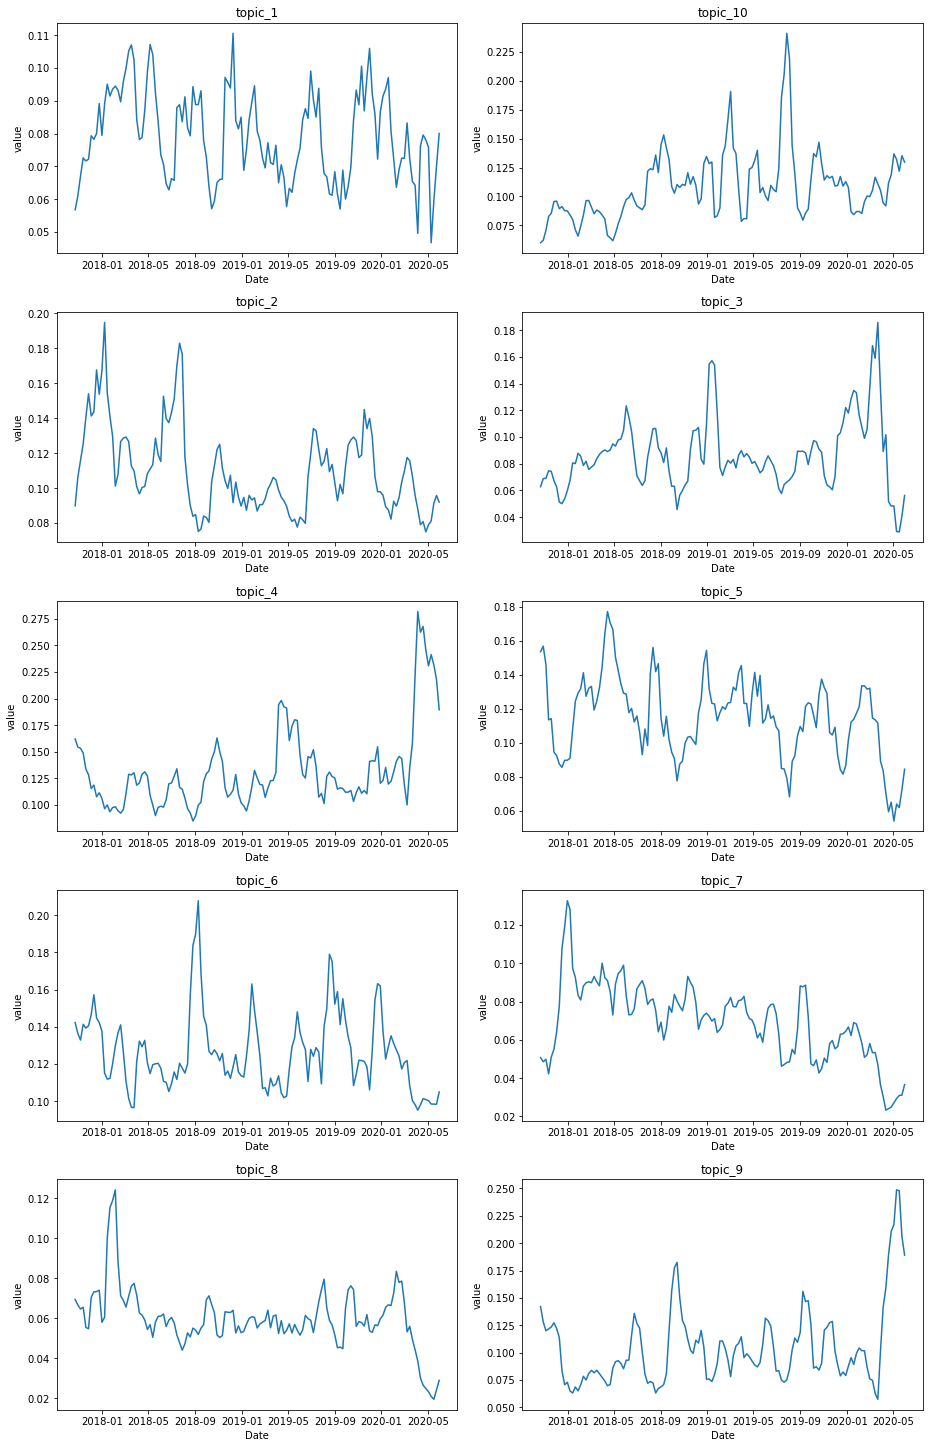

In [22]:
query = frequency_by_topic(data)
# query.head()
tweet_topic_lineplot(query, pivot_col = "topic")

In [33]:
tmp = query[['topic','Date','value']]
# tmp = tmp.pivot(index='Date', columns='topic', values='value').reset_index()
tmp.head()

,topic,Date,value
0,topic_1,2017-10-22,0.056748
1,topic_1,2017-10-29,0.060970
2,topic_1,2017-11-05,0.066998
3,topic_1,2017-11-12,0.072578
4,topic_1,2017-11-19,0.071648


<AxesSubplot:xlabel='Date', ylabel='value'>

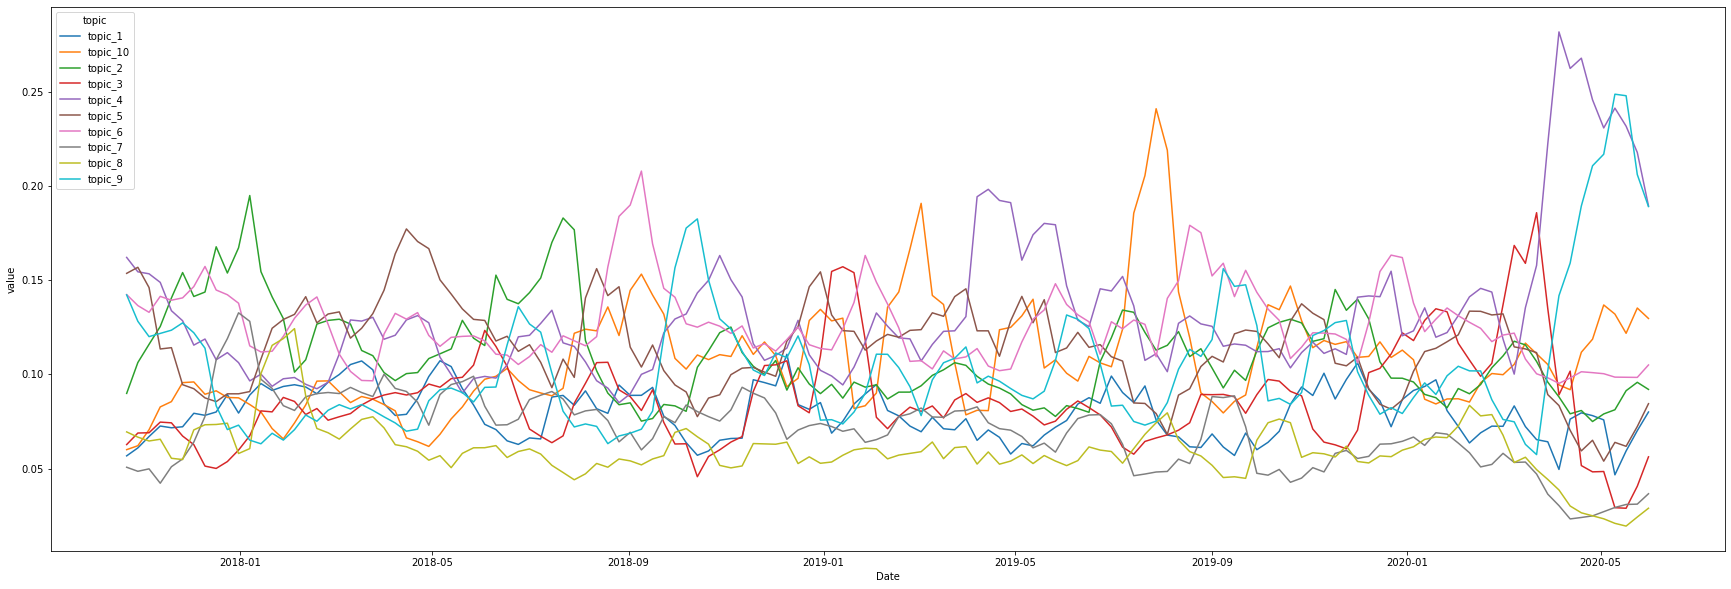

In [38]:
import seaborn as sns
plt.figure(figsize=(30,10))
sns.lineplot(data=tmp, x='Date', y='value', hue='topic')